In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import us

C:\Users\Jun Seo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Reading in excel spreadsheet of data
df = pd.read_excel('elsec15.xls')
df.head()

,STATE,IDCENSUS,NAME,CONUM,CSA,CBSA,SCHLEV,NCESID,YRDATA,V33,...,V32,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61
0,1,1500100100000,AUTAUGA COUNTY SCHOOL DISTRICT,1001,N,33860,3,0100240,15,9664,...,0,49431,16603,2992,63042,0,0,2094,372,8617
1,1,1500200100000,BALDWIN COUNTY SCHOOL DISTRICT,1003,380,19300,3,0100270,15,30596,...,0,337160,99087,13027,423220,0,0,5784,50441,71370
2,1,1500300100000,BARBOUR COUNTY SCHOOL DISTRICT,1005,N,N,3,0100300,15,925,...,0,8024,0,304,7720,0,0,0,0,646
3,1,1500300200000,EUFAULA CITY SCHOOL DISTRICT,1005,N,N,3,0101410,15,2829,...,0,0,0,0,0,0,0,0,2054,7478
4,1,1500400100000,BIBB COUNTY SCHOOL DISTRICT,1007,142,13820,3,0100360,15,3357,...,0,22155,0,1190,20965,0,0,1397,790,5400


In [3]:
# Renaming using US package
states = us.states.STATES

# Assigning number to each state
state_dict = {}
for i in range(len(states)):
    state_dict[i+1] = states[i].name

# Iteration through df to rename
for index, row in df.iterrows():
    code = row['STATE']
    df.ix[index, 'STATE'] = state_dict[code]

C:\Users\Jun Seo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [4]:
# Drop unnecessary columns
df.drop(['IDCENSUS', 'CONUM', 'CSA', 'CBSA', 'NCESID', 'YRDATA'], 1, inplace=True, errors='ignore')

In [5]:
# Group different types of revenue by state
revenue = df[['STATE', 'TFEDREV', 'TSTREV', 'TLOCREV']].groupby('STATE', as_index=False).sum()
revenue.head()

,STATE,TFEDREV,TSTREV,TLOCREV
0,Alabama,795238,4080167,2484817
1,Alaska,344111,2026555,550320
2,Arizona,1093834,3232013,3904660
3,Arkansas,581412,4075118,652095
4,California,7556365,42360470,28331207


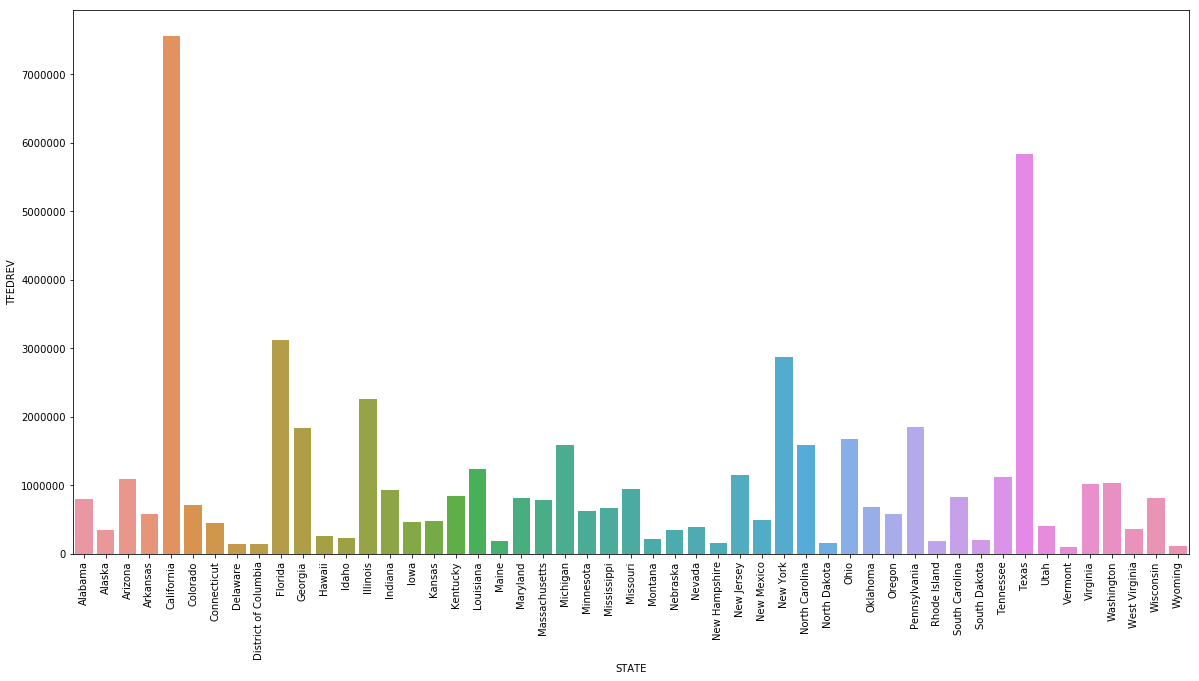

In [6]:
# Creating categorical barplot of federal revenue by state
plt.figure(figsize=(20,10))
sns.barplot('STATE', 'TFEDREV', data=revenue)
plt.xticks(rotation='vertical')
plt.show()

In [7]:
# Creating logs of federal/state/local revenue, as well as total salary expenditures
salaryRev = df[['TFEDREV', 'TSTREV', 'TLOCREV', 'Z32']]
salaryRev = salaryRev[(salaryRev != 0).all(1)]

fedRev = np.log(salaryRev['TFEDREV'])
stRev = np.log(salaryRev['TSTREV'])
locRev = np.log(salaryRev['TLOCREV'])
salary = np.log(salaryRev['Z32'])

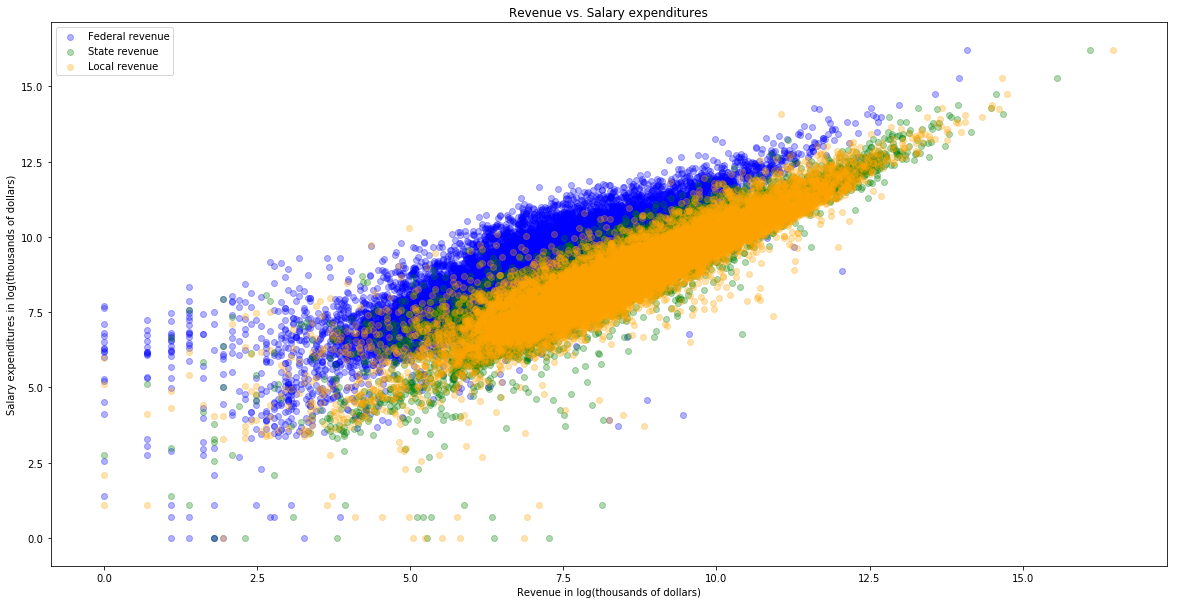

In [8]:
# Plotting all together
plt.figure(figsize=(20,10))
plt.scatter(fedRev, salary, color='blue', alpha=0.3)
plt.scatter(stRev, salary, color='green', alpha=0.3)
plt.scatter(locRev, salary, color='orange', alpha=0.3)
plt.legend(['Federal revenue', 'State revenue', 'Local revenue'])
plt.title('Revenue vs. Salary expenditures')
plt.xlabel('Revenue in log(thousands of dollars)')
plt.ylabel('Salary expenditures in log(thousands of dollars)')
plt.show()

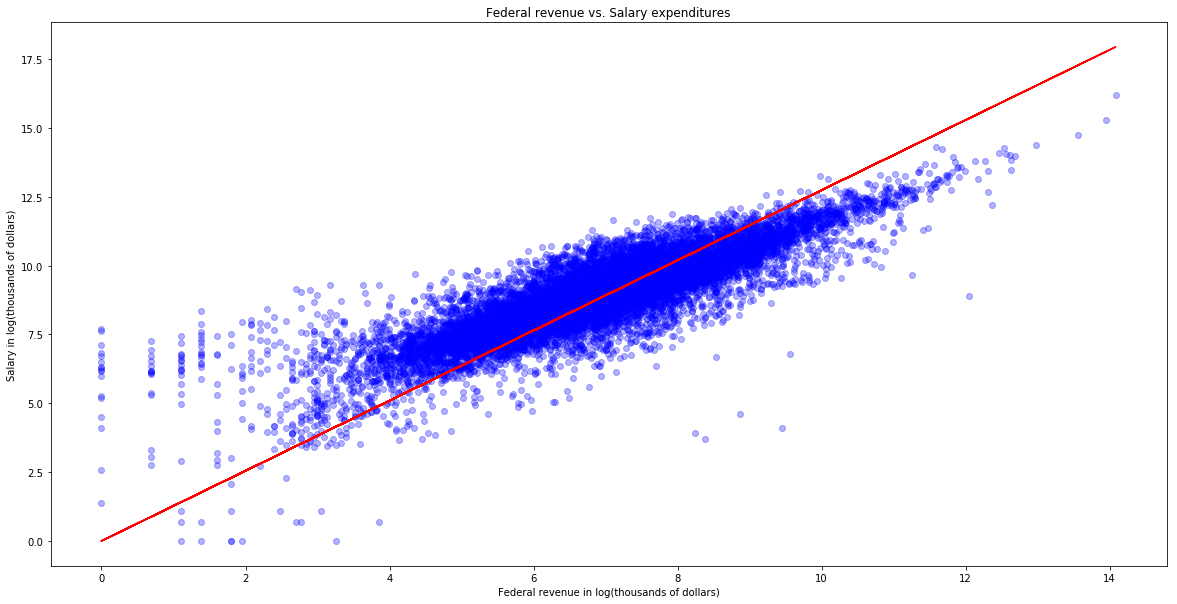

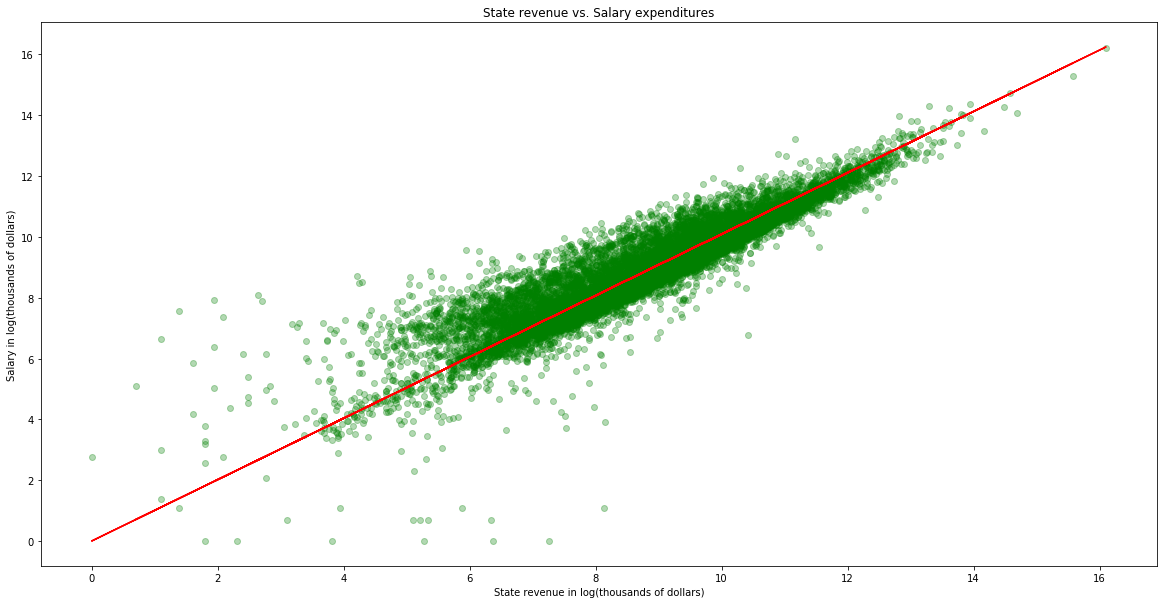

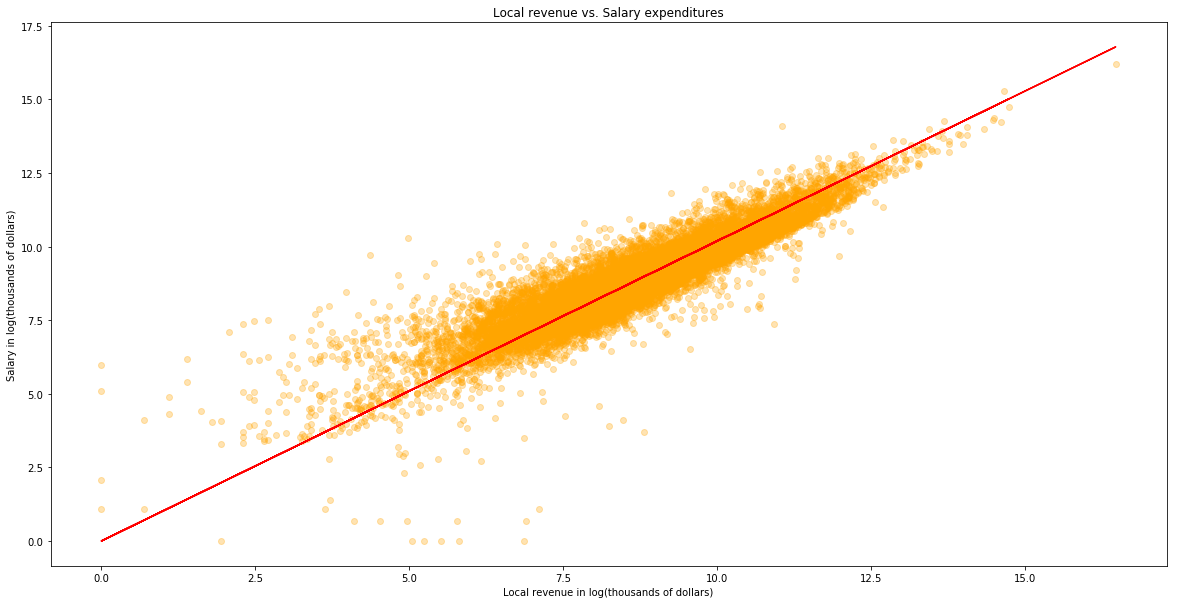

In [9]:
# Plotting one by one with linear regression line
plt.figure(1, figsize=(20,10))
plt.scatter(fedRev, salary, color='blue', alpha=0.3)
fedOLS = sm.OLS(salary, fedRev).fit()
plt.plot(fedRev, fedOLS.predict(fedRev), color='red')
plt.title('Federal revenue vs. Salary expenditures')
plt.xlabel('Federal revenue in log(thousands of dollars)')
plt.ylabel('Salary in log(thousands of dollars)')
plt.show()
plt.close()

plt.figure(2, figsize=(20,10))
plt.scatter(stRev, salary, color='green', alpha=0.3)
stOLS = sm.OLS(salary, stRev).fit()
plt.plot(stRev, stOLS.predict(stRev), color='red')
plt.title('State revenue vs. Salary expenditures')
plt.xlabel('State revenue in log(thousands of dollars)')
plt.ylabel('Salary in log(thousands of dollars)')
plt.show()
plt.close()

plt.figure(3, figsize=(20,10))
plt.scatter(locRev, salary, color='orange', alpha=0.3)
locOLS = sm.OLS(salary, locRev).fit()
plt.plot(locRev, locOLS.predict(locRev), color='red')
plt.title('Local revenue vs. Salary expenditures')
plt.xlabel('Local revenue in log(thousands of dollars)')
plt.ylabel('Salary in log(thousands of dollars)')
plt.show()
plt.close()

In [10]:
# Splitting by train, test set
fedRev_train, fedRev_test, salaryfed_train, salaryfed_test = train_test_split(fedRev, salary, test_size=0.33, random_state=42)
stRev_train, stRev_test, salaryst_train, salaryst_test = train_test_split(stRev, salary, test_size=0.33, random_state=42)
locRev_train, locRev_test, salaryloc_train, salaryloc_test = train_test_split(locRev, salary, test_size=0.33, random_state=42)

# MSE of federal revenue vs salary expenditures
fedOLS = sm.OLS(salaryfed_train, fedRev_train).fit()
salaryfed_hat = fedOLS.predict(fedRev_test)
mseFed = 1/len(salaryfed_test)*np.dot((salaryfed_test - salaryfed_hat), (salaryfed_test - salaryfed_hat))
print("The MSE for the model salary~fedRev is:", mseFed)

# MSE of state revenue vs salary expenditures
stOLS = sm.OLS(salaryst_train, stRev_train).fit()
salaryst_hat = stOLS.predict(stRev_test)
mseSt = 1/len(salaryst_test)*np.dot((salaryst_test - salaryst_hat), (salaryst_test - salaryst_hat))
print("The MSE for the model salary~stRev is:", mseSt)

# MSE of local revenue vs salary expenditures
locOLS = sm.OLS(salaryloc_train, locRev_train).fit()
salaryloc_hat = locOLS.predict(locRev_test)
mseLoc = 1/len(salaryloc_test)*np.dot((salaryloc_test - salaryloc_hat), (salaryloc_test - salaryloc_hat))
print("The MSE for the model salary~locRev is:", mseLoc)

The MSE for the model salary~fedRev is: 1.32021502626
The MSE for the model salary~stRev is: 0.430874473571
The MSE for the model salary~locRev is: 0.516586808525


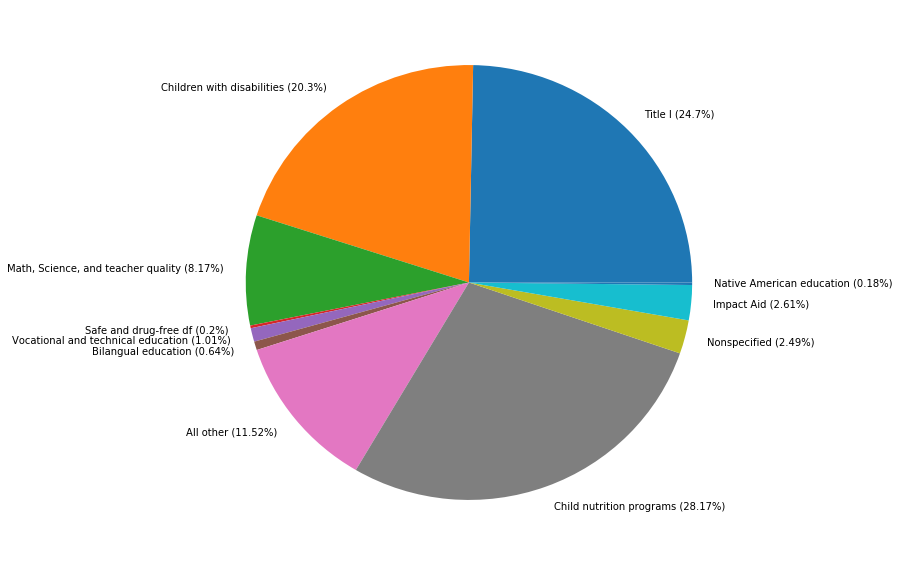

In [11]:
# Pie chart of components of federal revenue
totalf = sum(df['TFEDREV'])
y_data = [sum(df['C14'])/totalf, sum(df['C15'])/totalf, sum(df['C16'])/totalf + sum(df['B13'])/totalf, sum(df['C17'])/totalf,
         sum(df['C19'])/totalf, sum(df['B11'])/totalf, sum(df['C20'])/totalf, sum(df['C25'])/totalf,
         sum(df['C36'])/totalf, sum(df['B10'])/totalf, sum(df['B12'])/totalf]

x_data = ["Title I (" + str(round(y_data[0], 4) *100) + '%)', 
          "Children with disabilities (" + str(round(y_data[1], 4) *100) + '%)', 
          "Math, Science, and teacher quality (" + str(round(y_data[2], 4) *100) + '%)', 
          "Safe and drug-free df (" + str(round(y_data[3], 4) *100) + '%)', 
          "Vocational and technical education (" + str(round(y_data[4], 4) *100) + '%)', 
          "Bilangual education (" + str(round(y_data[5], 4) *100) + '%)',
          "All other (" + str(round(y_data[6], 4) *100) + '%)', 
          "Child nutrition programs (" + str(round(y_data[7], 4) *100) + '%)', 
          "Nonspecified (" + str(round(y_data[8], 4) *100) + '%)', 
          "Impact Aid (" + str(round(y_data[9], 4) *100) + '%)', 
          "Native American education (" + str(round(y_data[10], 4) *100) + '%)']

plt.figure(figsize=(10,10))
plt.pie(y_data, labels = x_data)
plt.show()

C:\Users\Jun Seo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


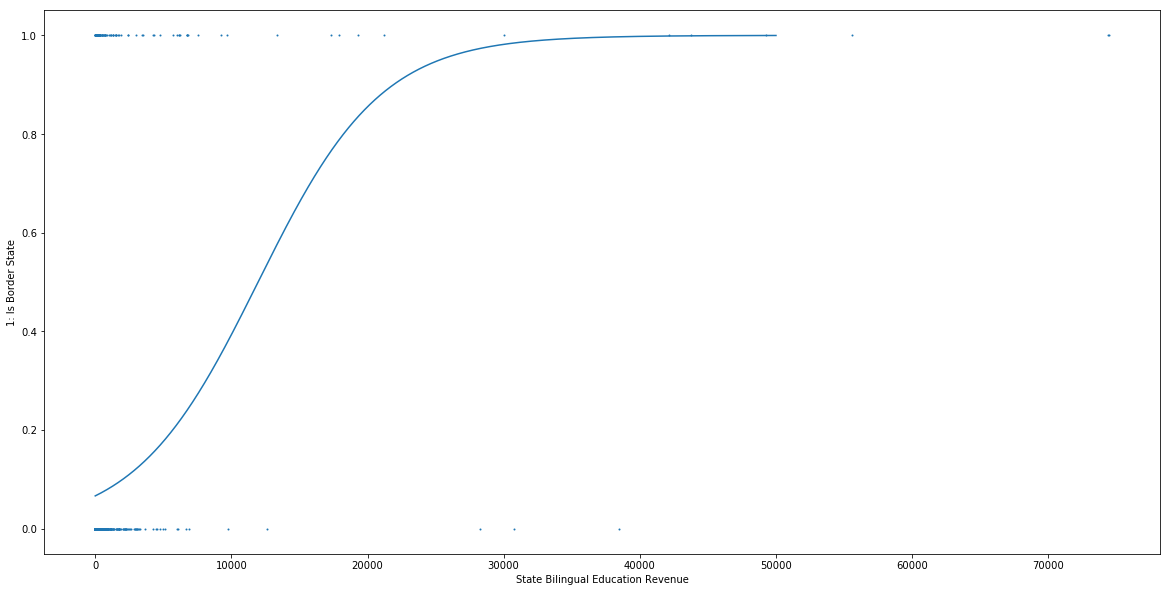

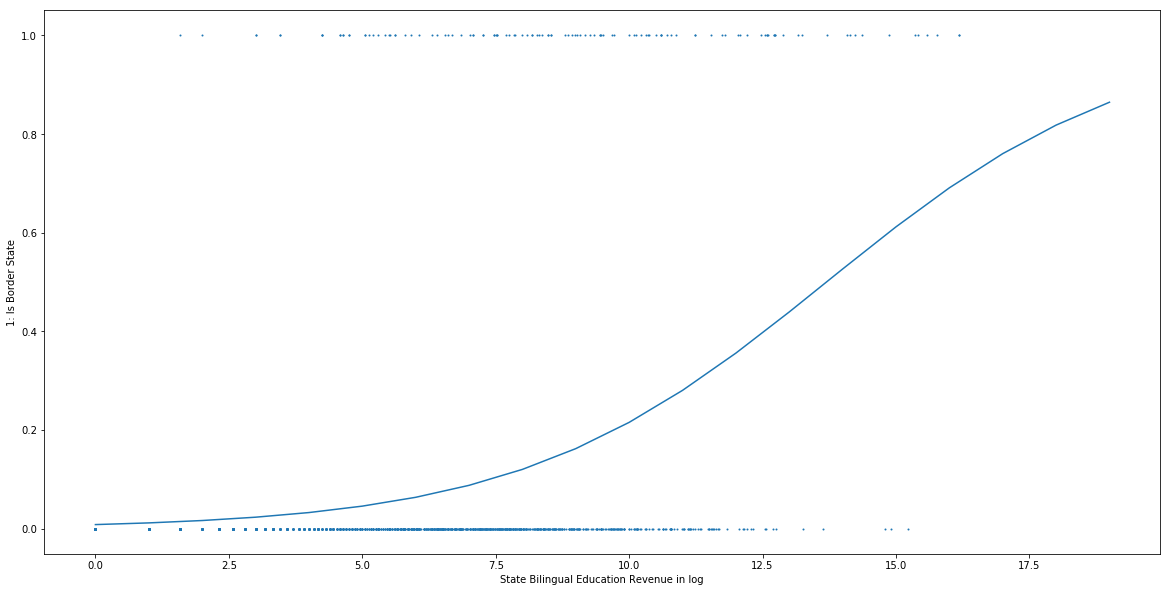

In [12]:
# Logistic Regression
workData= df[['STATE', 'C07']]

states = ['California', 'Nevada', 'Hawaii', 'Texas', 'Florida', 'New Jersey', 'Arizona', 'New York', 'Maryland', 'New Mexico']
for index, row in workData.iterrows():
    if row.STATE in states:
        workData.set_value(index, 'STATE', 1)
    else:
        workData.set_value(index, 'STATE', 0)
        
workData = workData[workData.C07 > 0]
workData = workData.rename(columns={"C07": "BilingualEducationRev"})
workData[workData.STATE == 1]

logistic = LogisticRegression()
logistic.fit(np.array(workData[['BilingualEducationRev']],dtype=int), np.array(workData[['STATE']],dtype=int))

x = np.arange(0, 50000)
probabilities = logistic.predict_proba(np.reshape(x.T, newshape=(-1,1)))
probabilities = [y for x, y in probabilities]
plt.figure(figsize=(20,10))
plt.plot(x, probabilities)
plt.scatter(workData.BilingualEducationRev, workData.STATE, s=1)
plt.xlabel("State Bilingual Education Revenue")
plt.ylabel("1: Is Border State")
plt.show()

logistic = LogisticRegression()
logistic.fit(np.log2(np.array(workData[['BilingualEducationRev']],dtype=int)), np.array(workData[['STATE']],dtype=int))

x = np.arange(0, 20)
probabilities = logistic.predict_proba(np.reshape(x.T, newshape=(-1,1)))
probabilities = [y for x, y in probabilities]
plt.figure(figsize=(20,10))
plt.plot(x, probabilities)
plt.scatter(np.log2(workData.BilingualEducationRev), workData.STATE, s=1)
plt.xlabel("State Bilingual Education Revenue in log")
plt.ylabel("1: Is Border State")
plt.show()

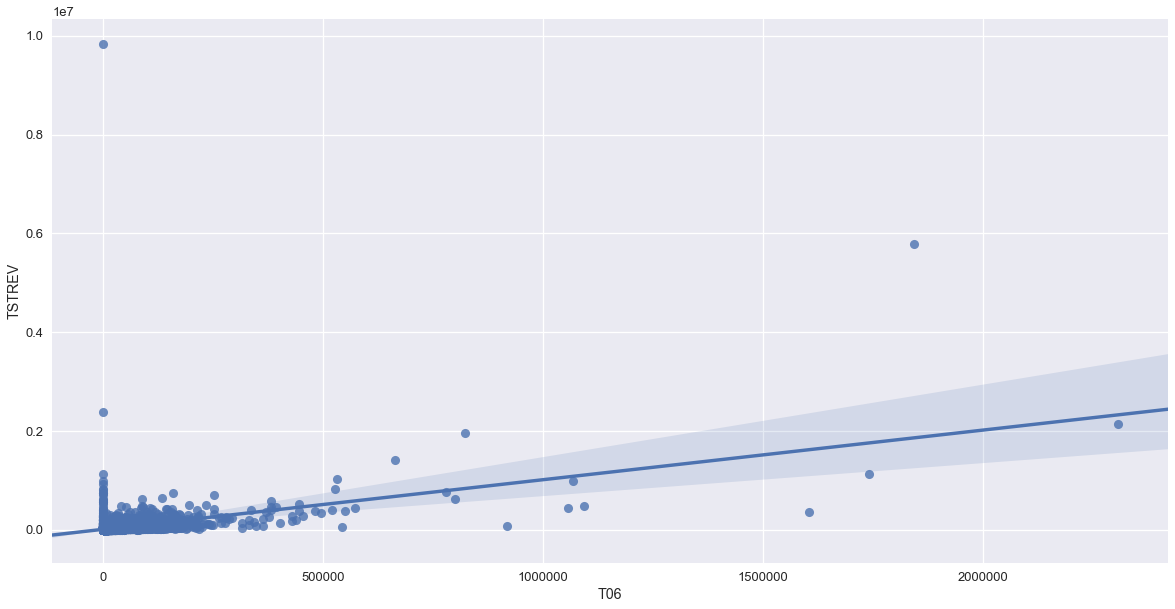

In [13]:
# Property Tax vs Federal Revenue
plt.figure(figsize=(20,10))
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
sns.regplot(data=df, x= 'T06', y='TSTREV' )
plt.show()